<a href="https://colab.research.google.com/github/ramya484/CRIME_NEXUS/blob/main/CRIME_NEXUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('CRIME_NEXUS.csv')

In [ ]:
df.head(5)

,Suspect_ID,Name,Connections_Type,Connections_Level,Political_Affiliation,Ruling_Party_Influence,Crime_Severity,Crime_Type,Prior_Convictions,Public_Interest,Arrested
0,1,Sanjay Roy,Mp,State,Ruling Party,Yes,High,Rape & Murder,No,High,Yes
1,2,Manu Sharma,Mp,National,Ruling Party,No,Medium,Murder,No,Medium,Yes
2,3,Ottavio Quattrocchi,Minister,National,Ruling Party,Yes,High,"Corruption, Bribery",No,High,No
3,4,A. Raja,Minister,State,Ruling Party,Yes,High,"Corruption, Fraud, Bribery",Yes,High,Yes
4,5,Mukesh Singh,NaN,NaN,NaN,No,High,Rape & Murder,Yes,High,Yes


In [ ]:
# Drop columns not used in training
df = df.drop(columns=['Suspect_ID', 'Name'])

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

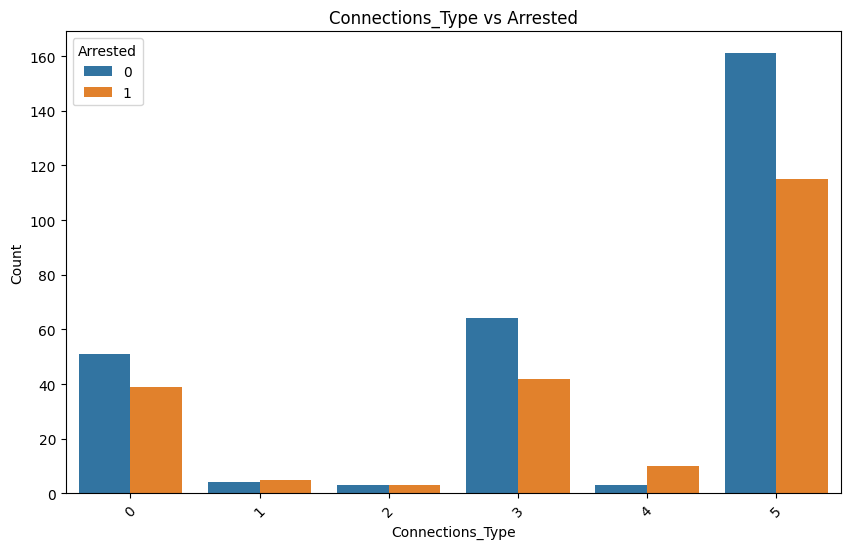

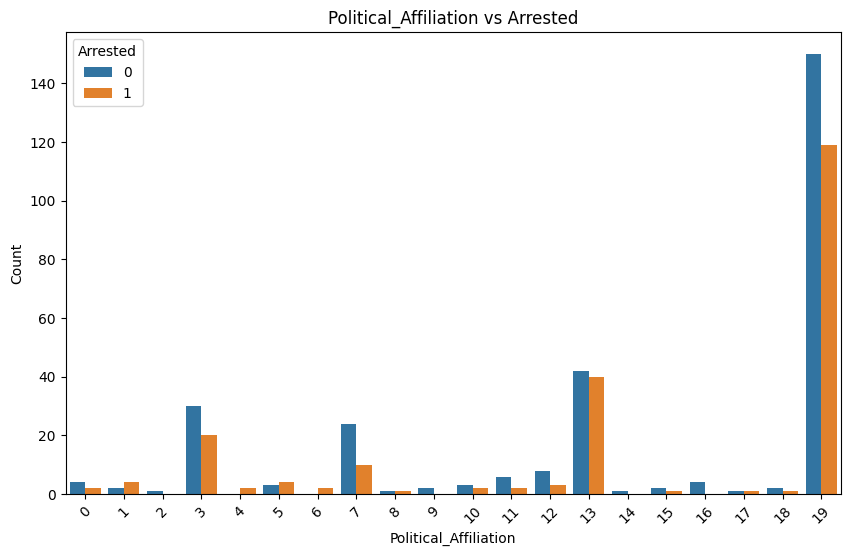

In [ ]:
# Relationship between Connections_Type and Arrested
plt.figure(figsize=(10, 6))
sns.countplot(x='Connections_Type', hue='Arrested', data=df)
plt.title('Connections_Type vs Arrested')
plt.xlabel('Connections_Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Relationship between Political_Affiliation and Arrested
plt.figure(figsize=(10, 6))
sns.countplot(x='Political_Affiliation', hue='Arrested', data=df)
plt.title('Political_Affiliation vs Arrested')
plt.xlabel('Political_Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

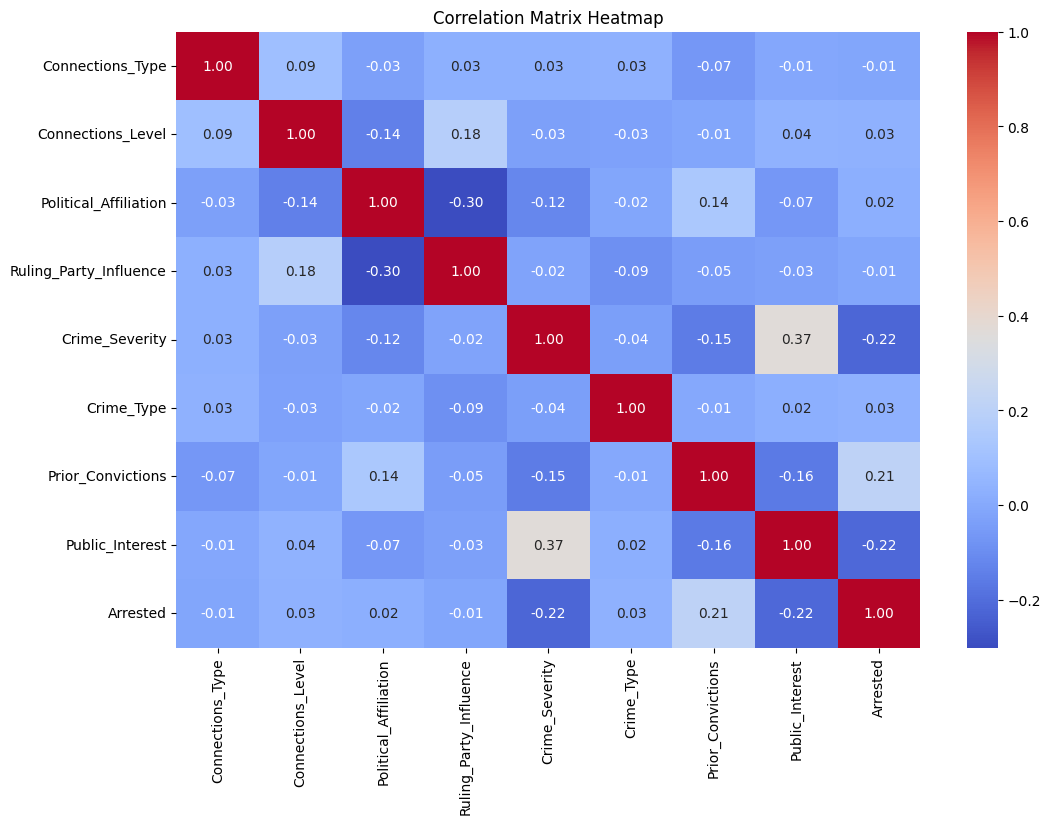

In [ ]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

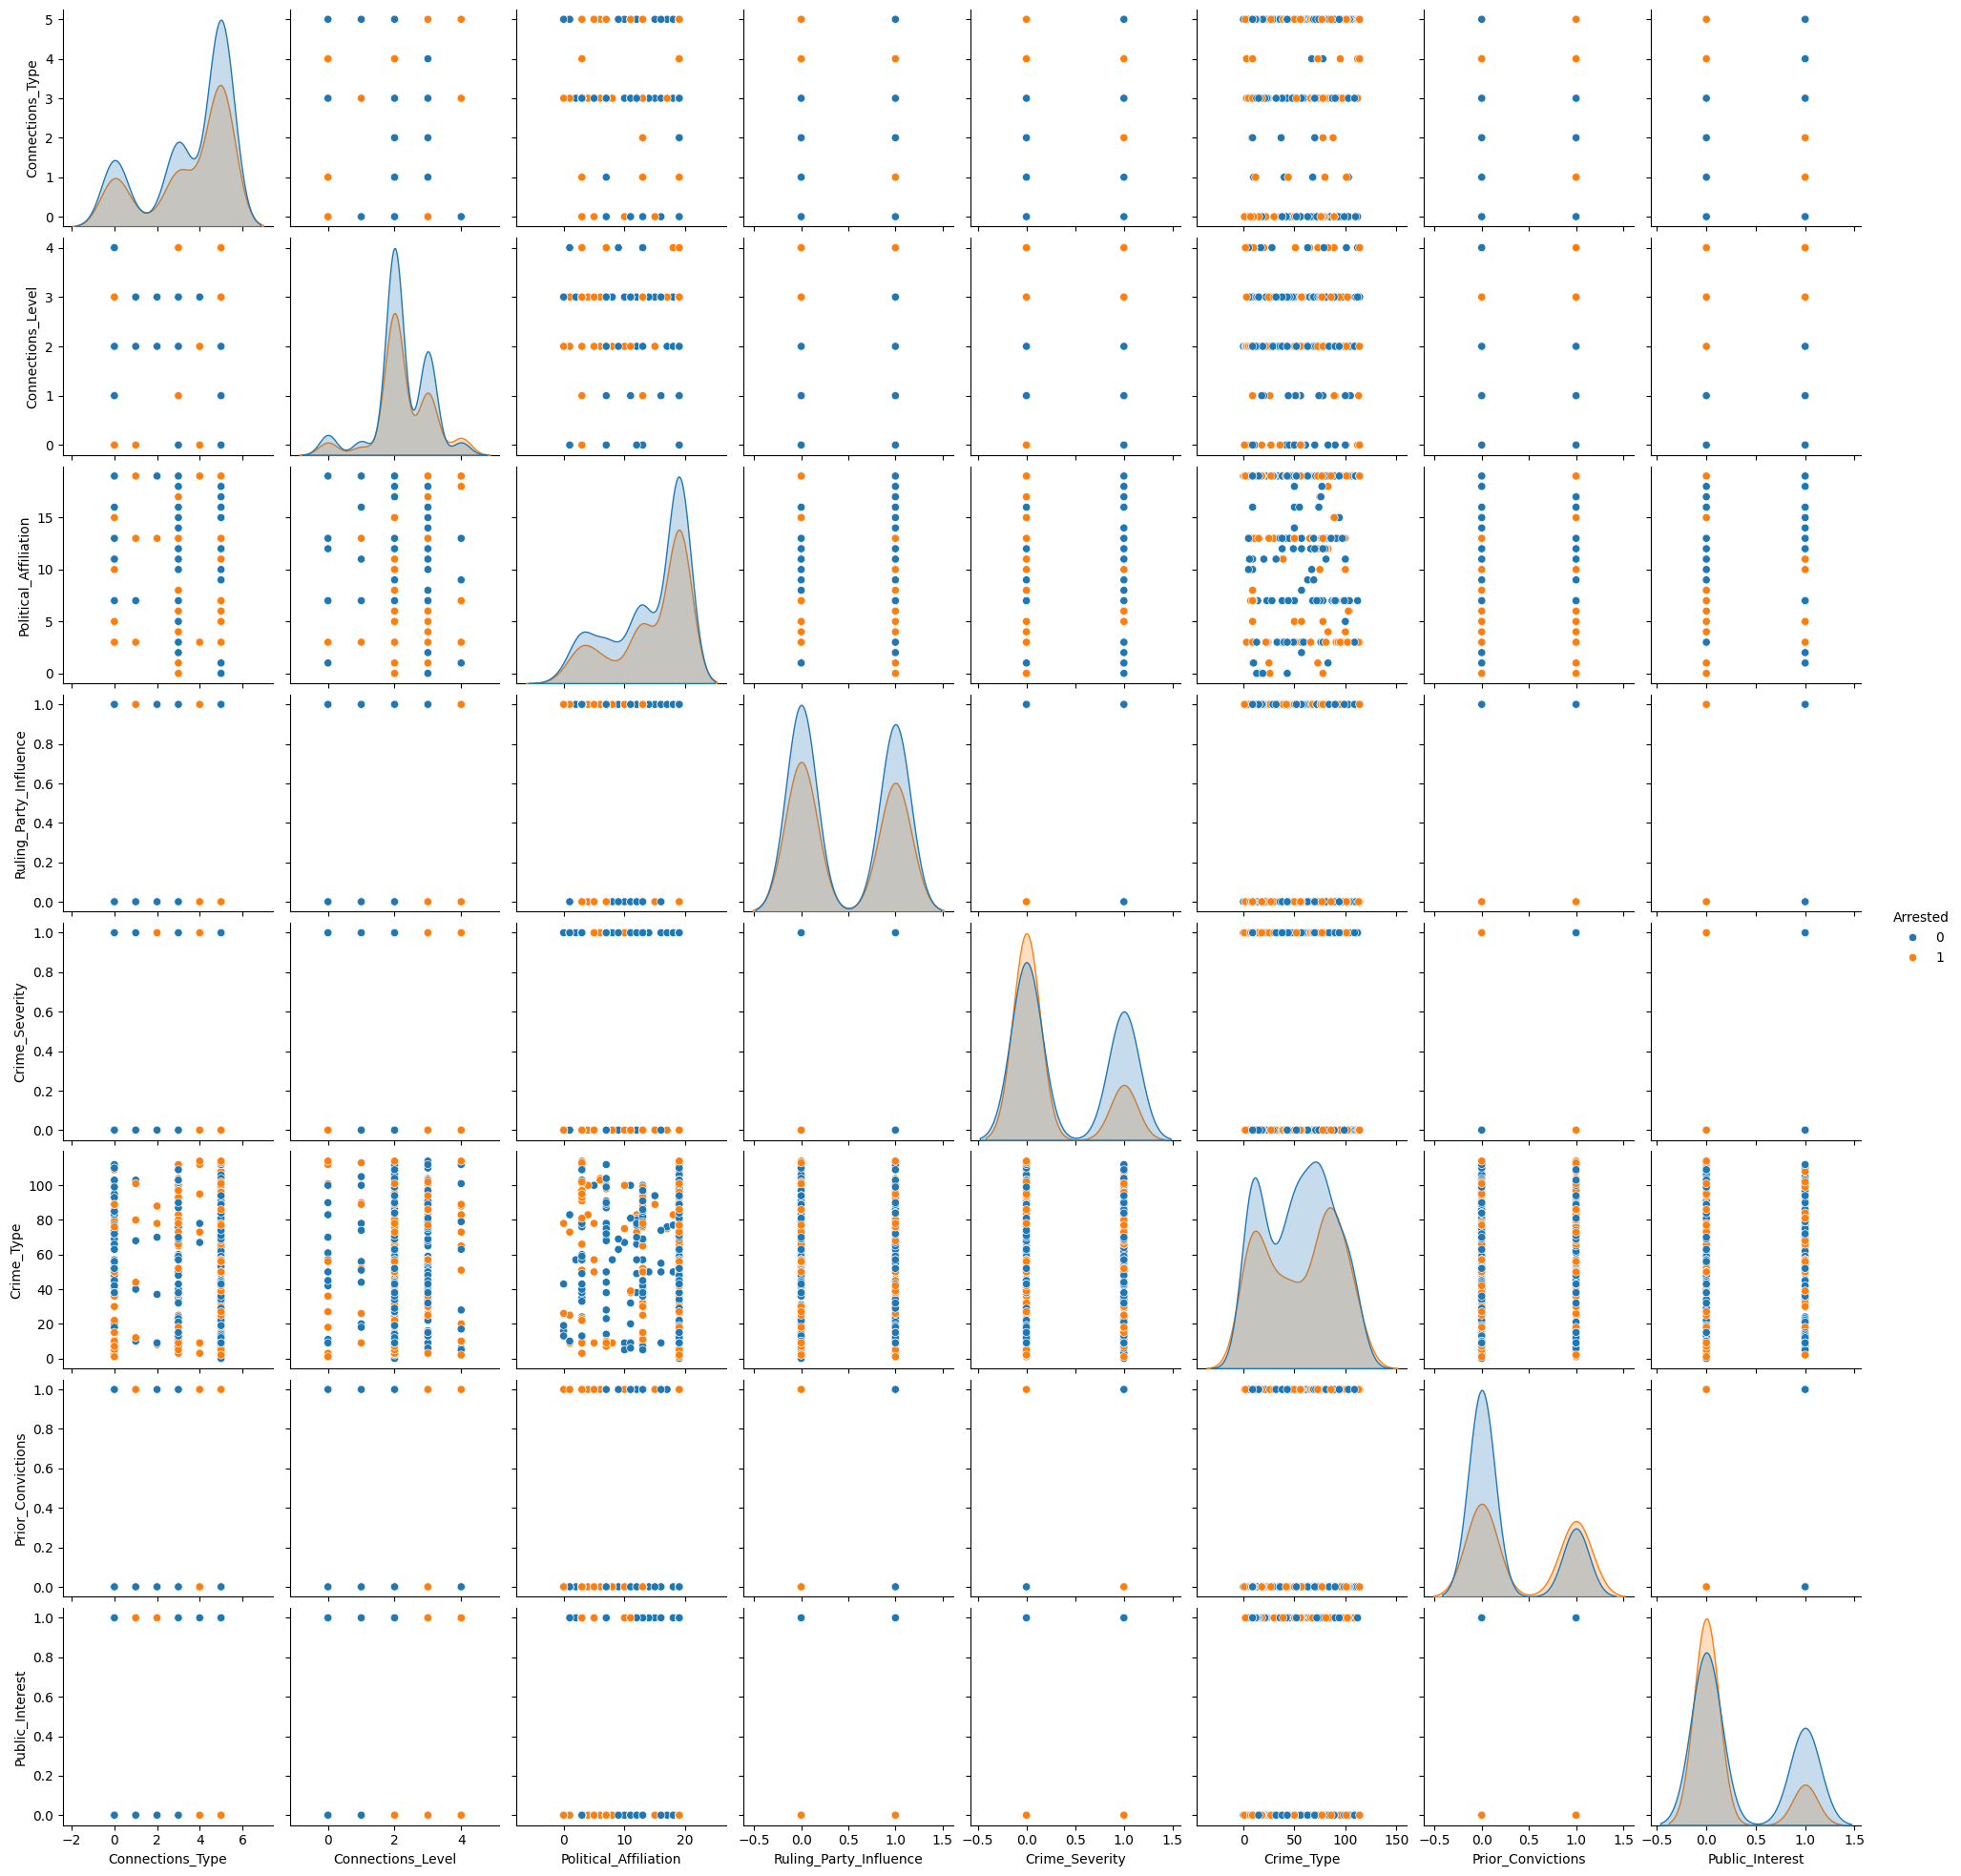

In [ ]:
# Pairplot
sns.pairplot(df, hue='Arrested')
plt.show()

In [ ]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['Arrested'])
y = df['Arrested']

In [ ]:
print(X)

     Connections_Type  Connections_Level  Political_Affiliation  \
0                   2                  3                     13   
1                   2                  2                     13   
2                   1                  2                     13   
3                   1                  3                     13   
4                   5                  4                     19   
..                ...                ...                    ...   
495                 5                  2                     19   
496                 5                  2                     19   
497                 0                  2                     19   
498                 5                  0                     19   
499                 5                  3                     19   

     Ruling_Party_Influence  Crime_Severity  Crime_Type  Prior_Convictions  \
0                         1               0          88                  0   
1                         0            

In [ ]:
print(y)

0      1
1      1
2      0
3      1
4      1
      ..
495    1
496    0
497    0
498    0
499    1
Name: Arrested, Length: 500, dtype: int64


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.68
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73        56
           1       0.67      0.55      0.60        44

    accuracy                           0.68       100
   macro avg       0.68      0.67      0.67       100
weighted avg       0.68      0.68      0.67       100

Confusion Matrix:
 [[44 12]
 [20 24]]
